# Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

#### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

## Importing Data

In [138]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [139]:
# Import all required packages
import numpy as np
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import MinMaxScaler

# To build the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [140]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Check

In [141]:
#Original Dataset Shape
data.shape

(1460, 81)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [143]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [144]:
#checking duplicates
sum(data.duplicated(subset='Id')) == 0

True

No duplicates

## Data Cleaning

In [145]:
print(data.isnull().values.any())

True


In [146]:
#Total Null values
print(data.isnull().values.sum())

6965


In [147]:
#Columnwise Null
miss_col=data.isnull().sum().sort_values(ascending=False)
miss_col

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [148]:
#Checking for Percentage Null
print(round(data.isnull().sum().sort_values(ascending = False)/len(data)*100),2)

PoolQC           100.0
MiscFeature       96.0
Alley             94.0
Fence             81.0
FireplaceQu       47.0
LotFrontage       18.0
GarageCond         6.0
GarageType         6.0
GarageYrBlt        6.0
GarageFinish       6.0
GarageQual         6.0
BsmtExposure       3.0
BsmtFinType2       3.0
BsmtFinType1       3.0
BsmtCond           3.0
BsmtQual           3.0
MasVnrArea         1.0
MasVnrType         1.0
Electrical         0.0
Utilities          0.0
YearRemodAdd       0.0
MSSubClass         0.0
Foundation         0.0
ExterCond          0.0
ExterQual          0.0
Exterior2nd        0.0
Exterior1st        0.0
RoofMatl           0.0
RoofStyle          0.0
YearBuilt          0.0
                 ...  
GarageArea         0.0
PavedDrive         0.0
WoodDeckSF         0.0
OpenPorchSF        0.0
3SsnPorch          0.0
BsmtUnfSF          0.0
ScreenPorch        0.0
PoolArea           0.0
MiscVal            0.0
MoSold             0.0
YrSold             0.0
SaleType           0.0
Functional 

In [149]:
miss_col[miss_col>0].count()

19

There are 19 columns which has missing values. 
Here in this case as per the description text given, these values may not be missing values.
Rather they imply that the particular feature is not available in that particular data point.
Before going further into imputation, lets look into row wise nulls

In [150]:
miss_row=data.isnull().sum(axis=1)
miss_row

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

In [151]:
miss_row[miss_row>10].max()

15

The worst data point in the dataset only has 15 nulls in it out of total 81 columns.
So we can go ahead with column NA imputation

#### Column NA imputation

In [152]:
miss_col[miss_col>0].reset_index(name='NA count')

,index,NA count
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageCond,81
7,GarageType,81
8,GarageYrBlt,81
9,GarageFinish,81


In [153]:
#NA in Pool QC means no pool
data['PoolQC'].fillna('No Pool', inplace=True)

In [154]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [155]:
##NA in MiscFeature means no additional features
data['MiscFeature'].fillna('None', inplace=True)

In [156]:
#NA means No alley access
data['Alley'].fillna('No alley access', inplace=True)

In [157]:
#NA means No fence
data['Fence'].fillna('No Fence', inplace=True)

In [158]:
#NA means No Fireplace
data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [159]:
#NA means No Garage
data['GarageCond'].fillna('No Garage', inplace=True)
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)

In [160]:
#GarageYrBlt: Year garage was built
#No of missing values here is the same as the number missing in GarageQual and GarageCond
#Here it does not make sense to impute these values.
#Therefore we can drop the column
data.drop('GarageYrBlt', axis=1, inplace=True)

In [161]:
#sns.heatmap(data[['GarageCond','GarageType','GarageFinish','GarageQual','GarageYrBlt']].corr(),annot = True)

In [162]:
#NA means No Basement
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtQual'].fillna('No Basement', inplace=True)

In [163]:
data[data['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [164]:
# NA means in Masonry Veneer Type that it is not there
data['MasVnrType'].fillna('None', inplace=True)
#Whenever MasVnrType is NA, MasVnrAre is Area.(As shown above). Therefore the area is imputed as 0
data['MasVnrArea'].fillna(0, inplace=True)

In [165]:
# NA in Electrical mostly implies Mix as everything else is given specifically
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [166]:
data['Electrical'].fillna('Mix', inplace=True)

In [167]:
#LotFrontage: Linear feet of street connected to property
#Imputing with median Frontage of the neighbourhood.
data["LotFrontage"] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [168]:
#Check again for nulls
print(round(data.isnull().sum().sort_values(ascending = False)/len(data)*100),2)

SalePrice        0.0
SaleCondition    0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
                ... 
PoolArea         0.0
GarageCars       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageArea       0.0
GarageFinish     0.0
CentralAir       0.0
FullBath         0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF 

In [169]:
#Data Shape after data cleaning
data.shape

(1460, 80)

We didnt lose any data points after data cleaning.

### Categorical Variables

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [171]:
#Here we can see many categorical variables (as per the description text) are taken as numerical.
#converting them back
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')
data['YearBuilt'] = data['YearBuilt'].astype('object')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('object')


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      146

In [173]:
data.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [174]:
data[['GrLivArea','TotalBsmtSF','1stFlrSF','2ndFlrSF']].head()

,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,1710,856,856,854
1,1262,1262,1262,0
2,1786,920,920,866
3,1717,756,961,756
4,2198,1145,1145,1053


In [175]:
data[['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath']].head()

,BsmtFullBath,FullBath,BsmtHalfBath,HalfBath
0,1,2,0,1
1,0,2,1,0
2,1,2,0,1
3,1,1,0,0
4,1,2,0,1


## Derived Features

In [176]:
#Total Area
data['Total_Area'] = (data['TotalBsmtSF'] + 
                         data['GrLivArea'])

In [177]:
#Total Number of Bathrooms
data['Total_No_Of_Bathrooms'] = ((data['BsmtFullBath']) + 
                            (data['FullBath']) +
                            (data['BsmtHalfBath']/2) +
                            (data['HalfBath']/2))

In [178]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Area,Total_No_Of_Bathrooms
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,No Fence,None,0,2,2008,WD,Normal,208500,2566,3.5
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,No Fence,None,0,5,2007,WD,Normal,181500,2524,2.5
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,No Fence,None,0,9,2008,WD,Normal,223500,2706,3.5
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,No Fence,None,0,2,2006,WD,Abnorml,140000,2473,2.0
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,No Fence,None,0,12,2008,WD,Normal,250000,3343,3.5


## Outlier Treatment

In [202]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Total_Area,Total_No_Of_Bathrooms
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,61,0,0,0,0,0,208500,2566,3.5
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,181500,2524,2.5
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0,42,0,0,0,0,0,223500,2706,3.5
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0,35,272,0,0,0,0,140000,2473,2.0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,250000,3343,3.5
5,6,85.0,14115,0.0,732,0,64,796,796,566,...,40,30,0,320,0,0,700,143000,2158,2.5
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,...,255,57,0,0,0,0,0,307000,3380,3.0
7,8,80.0,10382,240.0,859,32,216,1107,1107,983,...,235,204,228,0,0,0,350,200000,3197,3.5
8,9,51.0,6120,0.0,0,0,952,952,1022,752,...,90,0,205,0,0,0,0,129900,2726,2.0
9,10,50.0,7420,0.0,851,0,140,991,1077,0,...,0,4,0,0,0,0,0,118000,2068,2.0


In [203]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 1459
Data columns (total 32 columns):
Id                       1415 non-null int64
LotFrontage              1415 non-null float64
LotArea                  1415 non-null int64
MasVnrArea               1415 non-null float64
BsmtFinSF1               1415 non-null int64
BsmtFinSF2               1415 non-null int64
BsmtUnfSF                1415 non-null int64
TotalBsmtSF              1415 non-null int64
1stFlrSF                 1415 non-null int64
2ndFlrSF                 1415 non-null int64
LowQualFinSF             1415 non-null int64
GrLivArea                1415 non-null int64
BsmtFullBath             1415 non-null int64
BsmtHalfBath             1415 non-null int64
FullBath                 1415 non-null int64
HalfBath                 1415 non-null int64
BedroomAbvGr             1415 non-null int64
KitchenAbvGr             1415 non-null int64
TotRmsAbvGrd             1415 non-null int64
Fireplaces               1415 non-

In [180]:
#Although the values are numeric, multiple features are categorical.
#Therefore for our analysis, we will drop them
data_numeric = data_numeric.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'], axis=1)
data_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Total_Area,Total_No_Of_Bathrooms
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,61,0,0,0,0,0,208500,2566,3.5
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,181500,2524,2.5
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0,42,0,0,0,0,0,223500,2706,3.5
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0,35,272,0,0,0,0,140000,2473,2.0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,250000,3343,3.5


In [181]:
data_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Total_Area,Total_No_Of_Bathrooms
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,2572.893151,2.210616
std,421.610009,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,823.598492,0.785399
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,334.000000,1.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,2014.000000,2.000000
50%,730.500000,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,2479.000000,2.000000
75%,1095.250000,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,3008.500000,2.500000
90%,1314.100000,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,3566.300000,3.500000
95%,1387.050000,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,3973.400000,3.500000
99%,1445.410000,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,4845.250000,4.000000


In [182]:
backup1 = data.copy()

In [183]:
data=backup1.copy()

In [184]:
data.shape

(1460, 82)

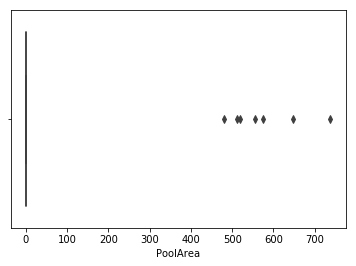

In [185]:
#Pool Area
sns.boxplot(data['PoolArea'])

Does not qualify to be outliers

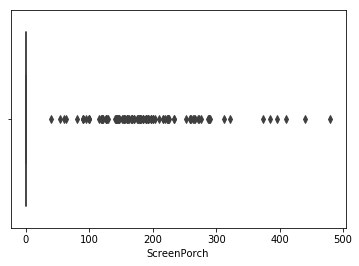

In [186]:
#ScreenPorch
sns.boxplot(data['ScreenPorch'])

Does not qualify to be outliers

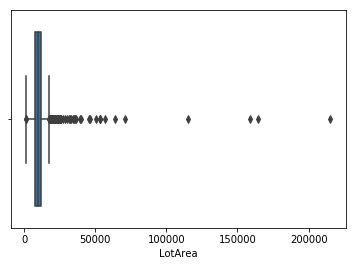

In [187]:
sns.boxplot(data['LotArea'])

In [188]:
#Removing Outliers
percentiles = data['LotArea'].quantile([0.001,0.99]).values
data= data[data['LotArea'] <= percentiles[1]]

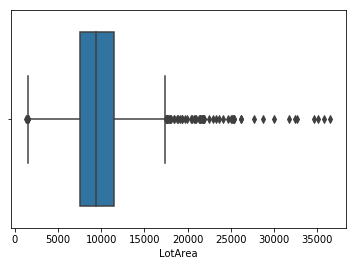

In [189]:
sns.boxplot(data['LotArea'])

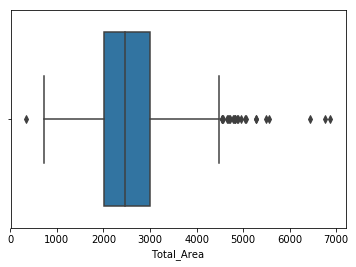

In [194]:
sns.boxplot(data['Total_Area'])

In [195]:
#Removing Outliers
percentiles = data['Total_Area'].quantile([0.001,0.99]).values
data= data[data['Total_Area'] <= percentiles[1]]

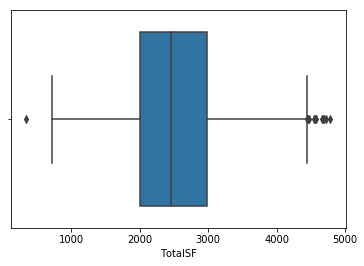

In [56]:
sns.boxplot(data['Total_Area'])

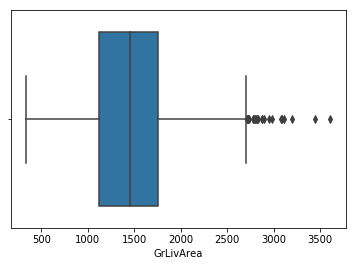

In [196]:
sns.boxplot(data['GrLivArea'])

In [197]:
percentiles = data['GrLivArea'].quantile([0.001,0.99]).values
data= data[data['GrLivArea'] <= percentiles[1]]

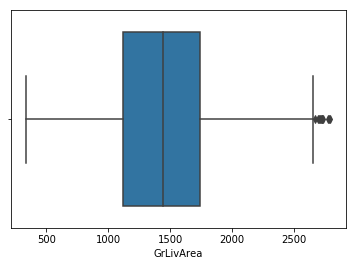

In [198]:
sns.boxplot(data['GrLivArea'])

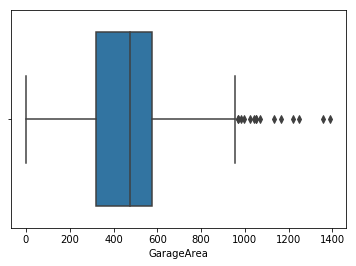

In [199]:
sns.boxplot(data['GarageArea'])

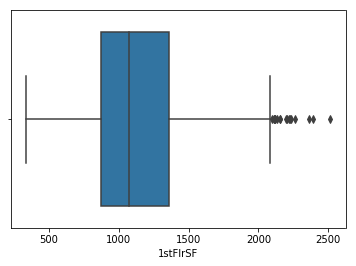

In [200]:
sns.boxplot(data['1stFlrSF'])

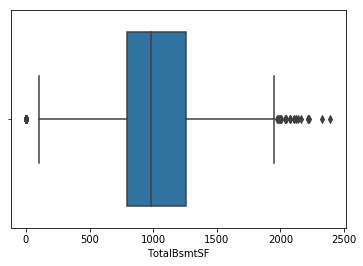

In [62]:
sns.boxplot(data['TotalBsmtSF'])

In [63]:
data.shape

(1415, 82)

% of data retained after outlier treatment is 100- (1460 - 1415)*100/1460 =96.9%

## Exploratory Data Analysis

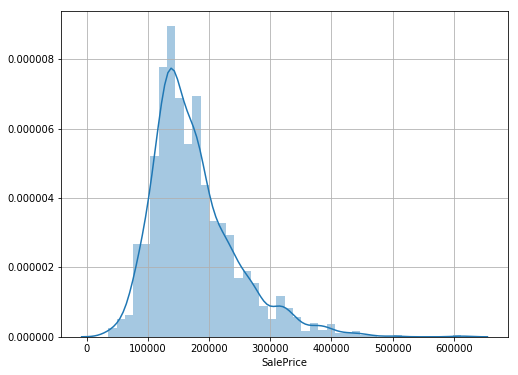

In [64]:
plt.figure(figsize = (8,6))
ax=sns.distplot(data['SalePrice'])
ax.grid(True)

Observations
Majority of the houses are between 50000 and 350000 price range.

### Data Correlation

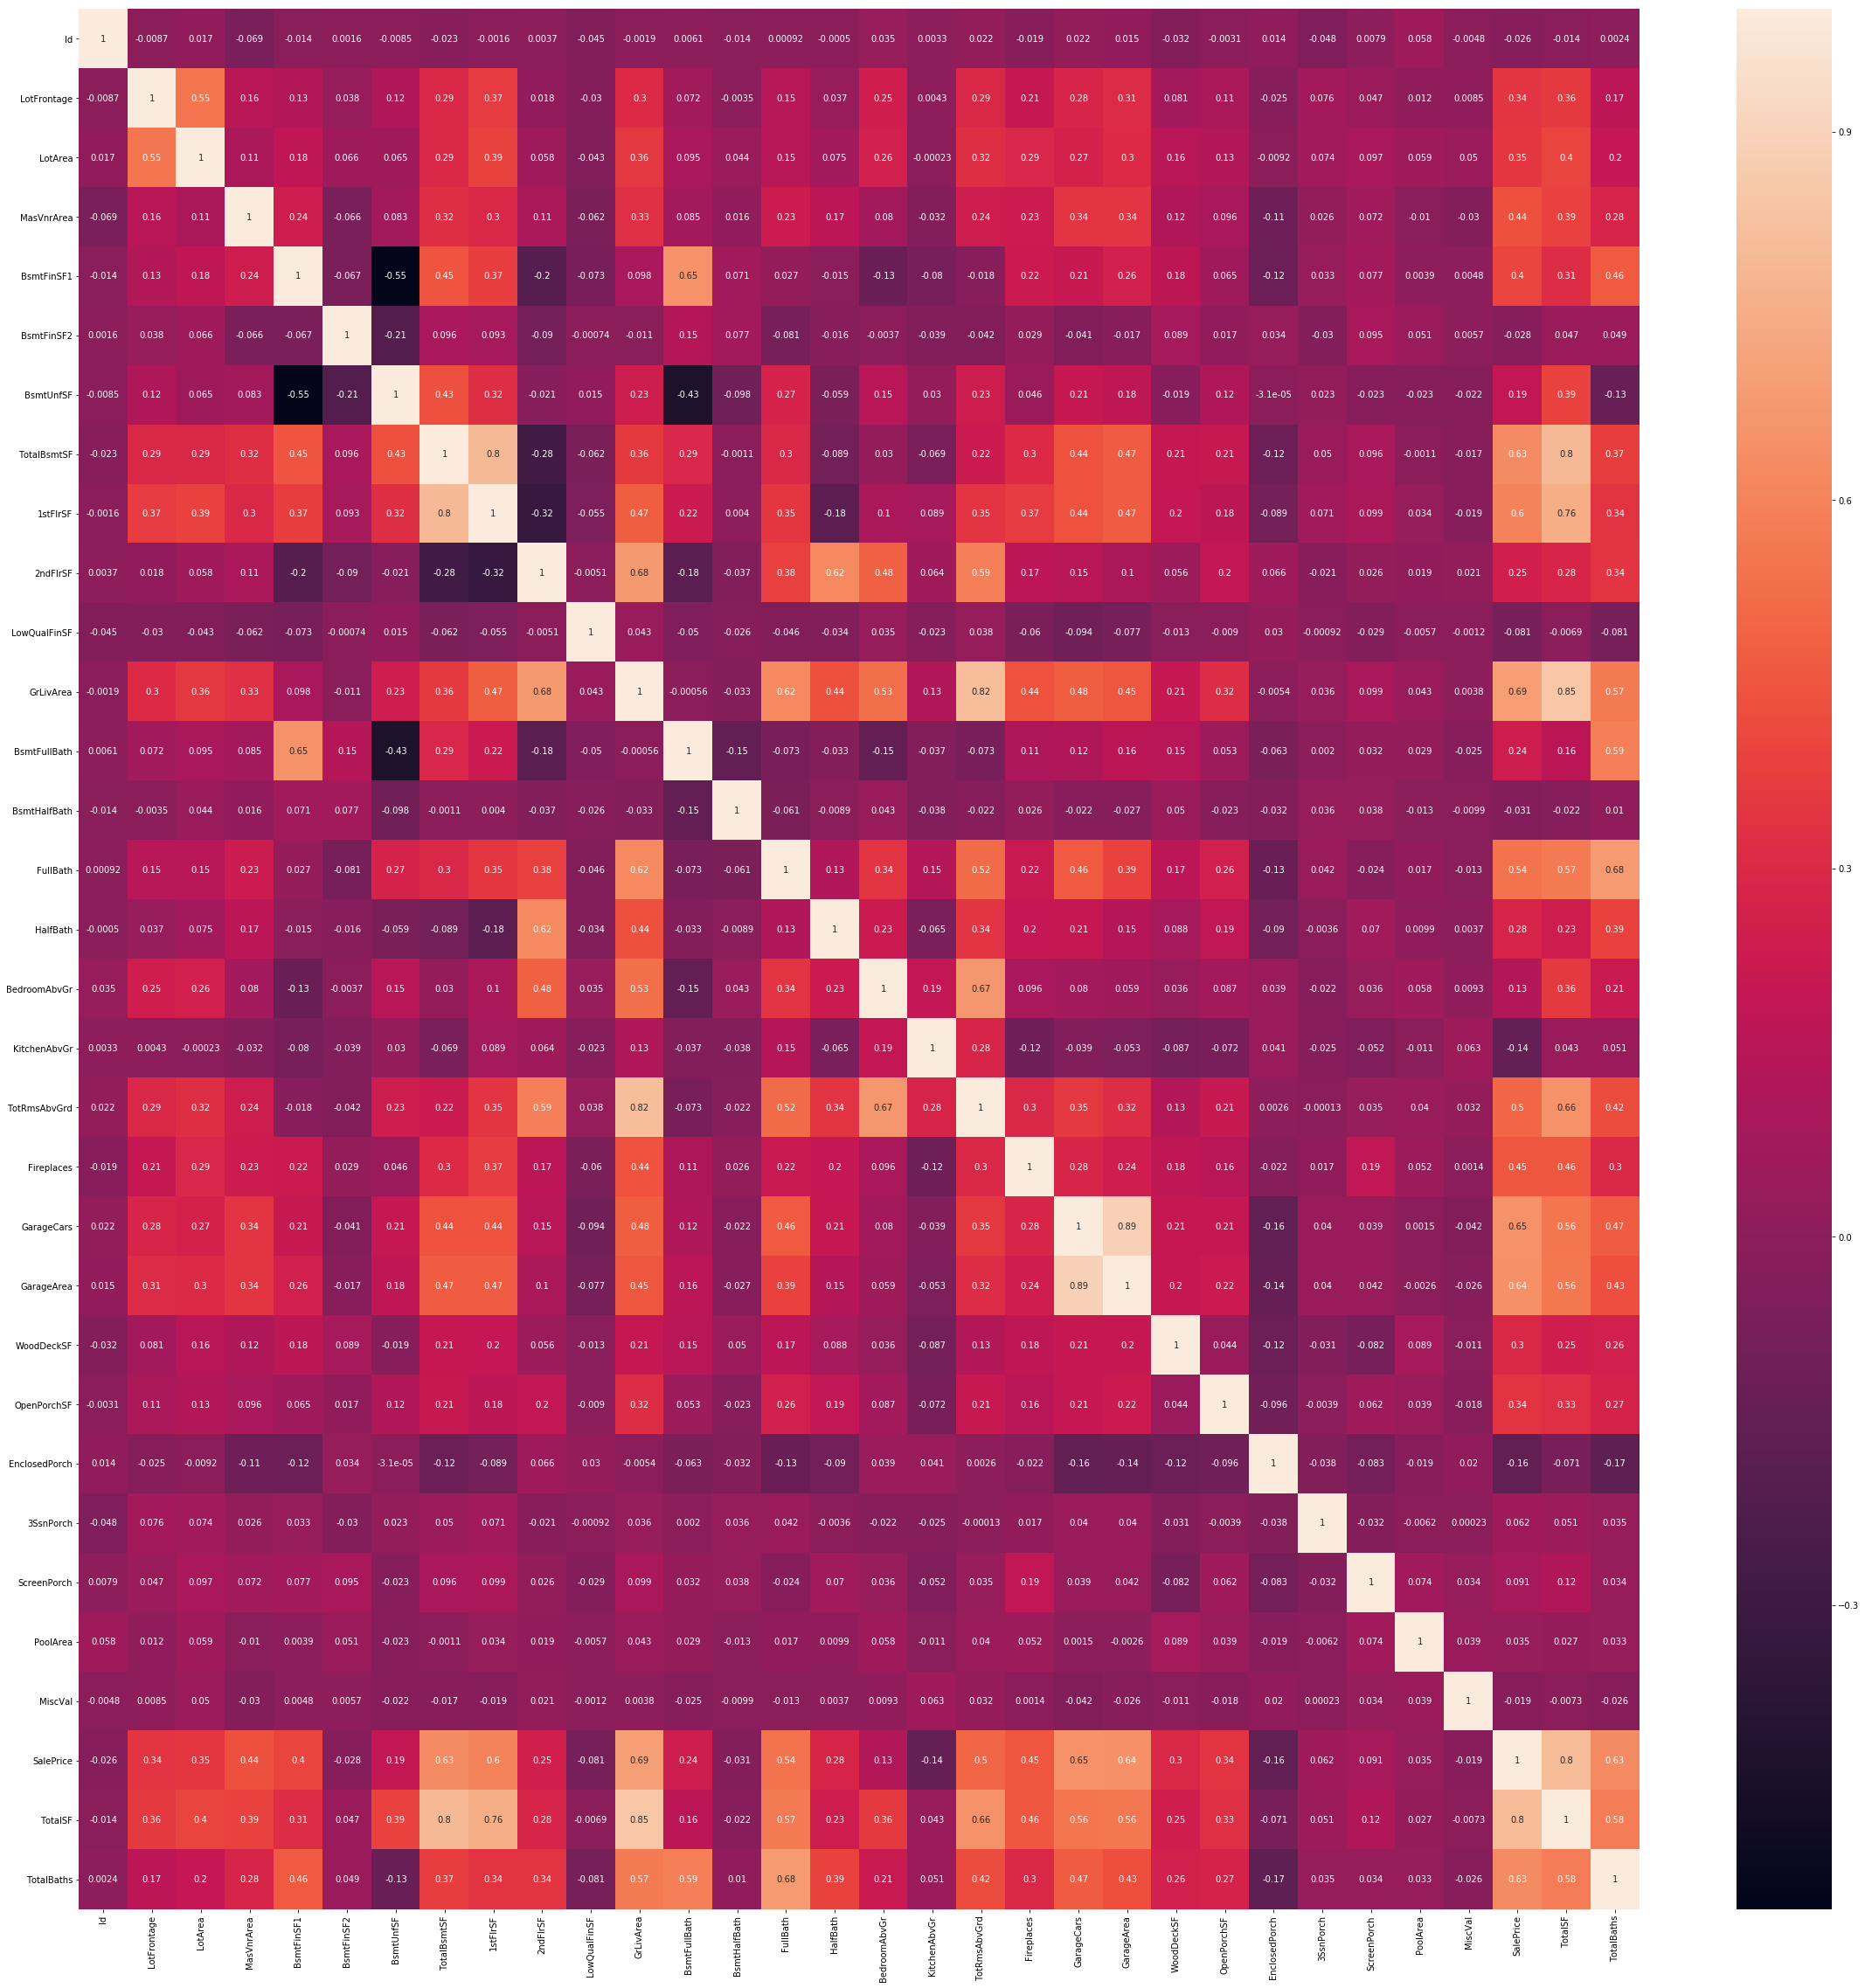

In [65]:
plt.figure(figsize = (40,40))
sns.heatmap(data.corr(), annot=True)

Heavy correlation is observed between below pairs
1)  1stFlrSF and Total_Area
2) GarageCars and GarageArea 
3) GrLivArea and TotRmsAbvGrd
4) GrLivArea and Total_Area
5) 1stFlrSF and TotalBsmtSF
6) TotalBsmtSF and Total_Area

This is due to multicollinearity which we will make the model take care.

In [201]:
backup2 = data.copy()

## BIVARIATE ANALYSIS

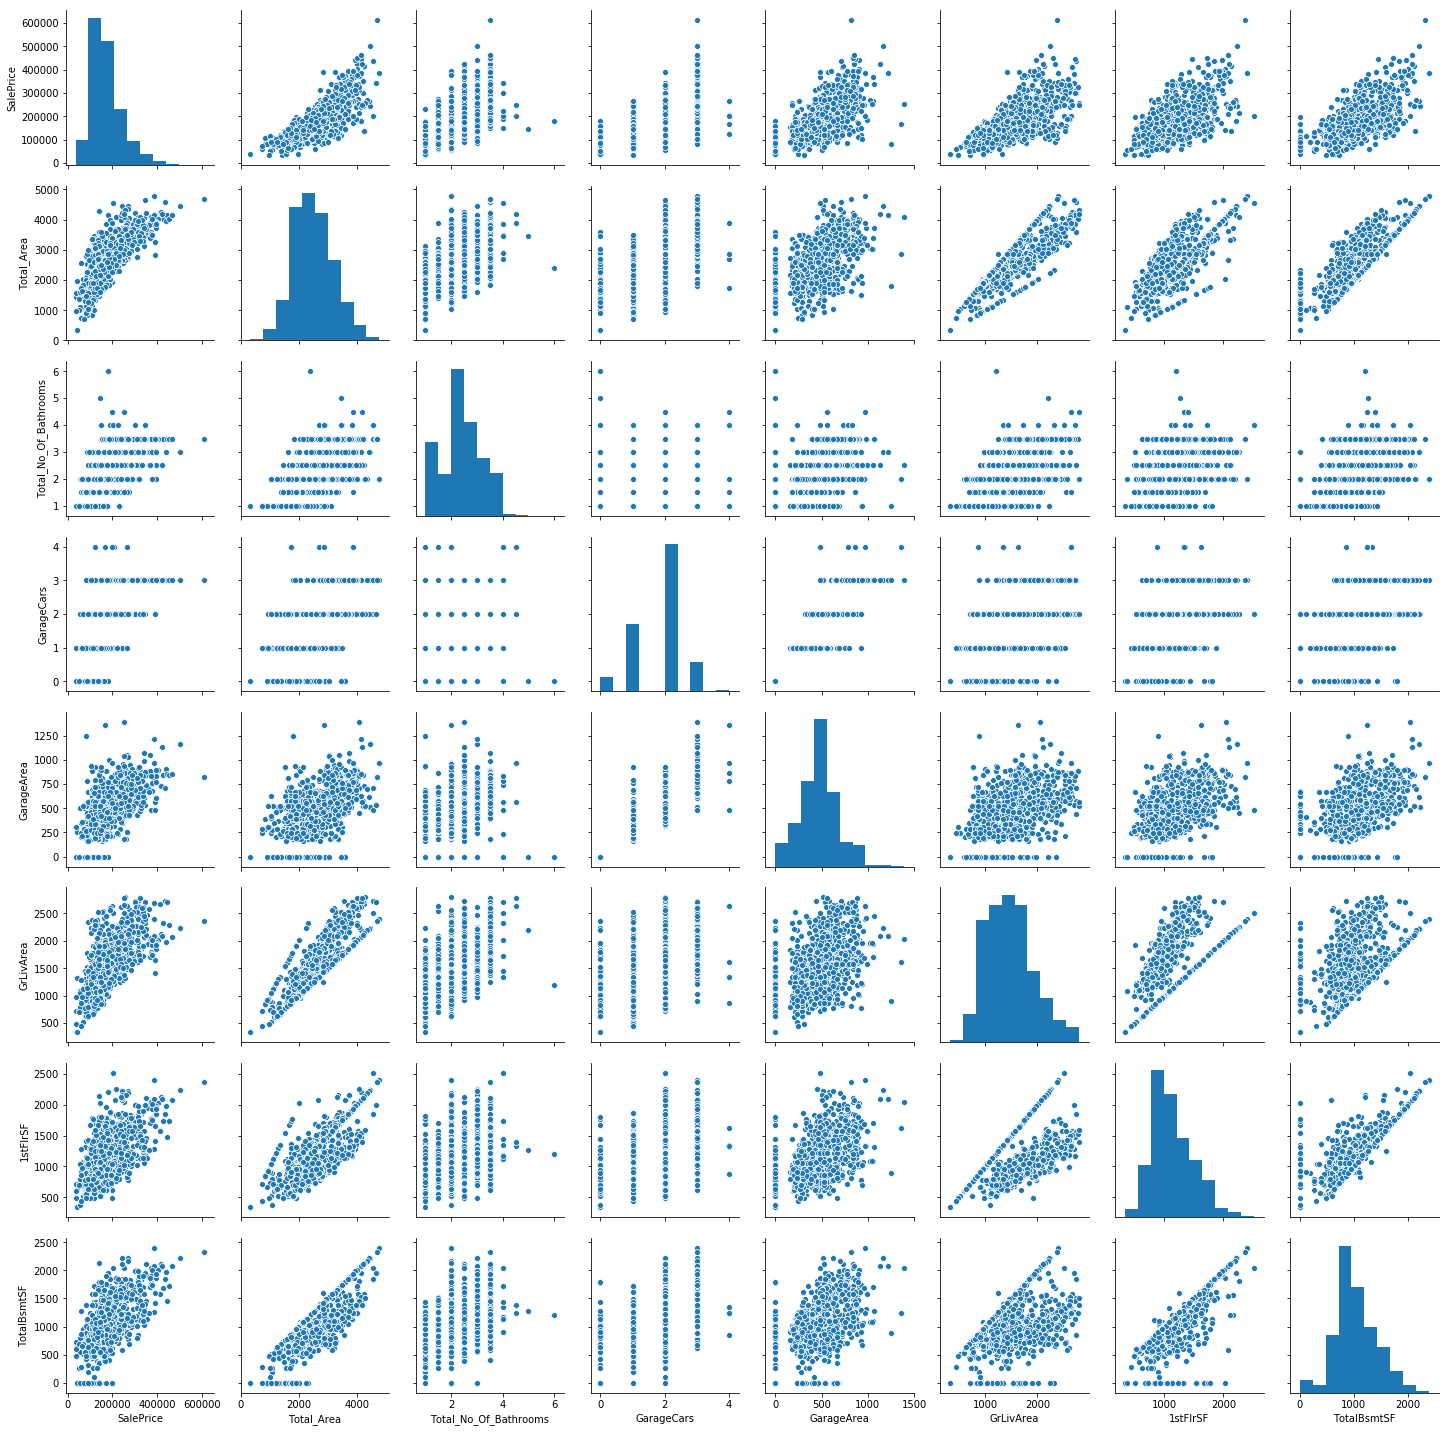

In [204]:
corr = ['SalePrice', 'Total_Area', 'Total_No_Of_Bathrooms', 'GarageCars', 'GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']

sns.pairplot(data[corr])
plt.show()

Clear Linear Relationship between sales price and these variables is shown.
Lets delve further and see

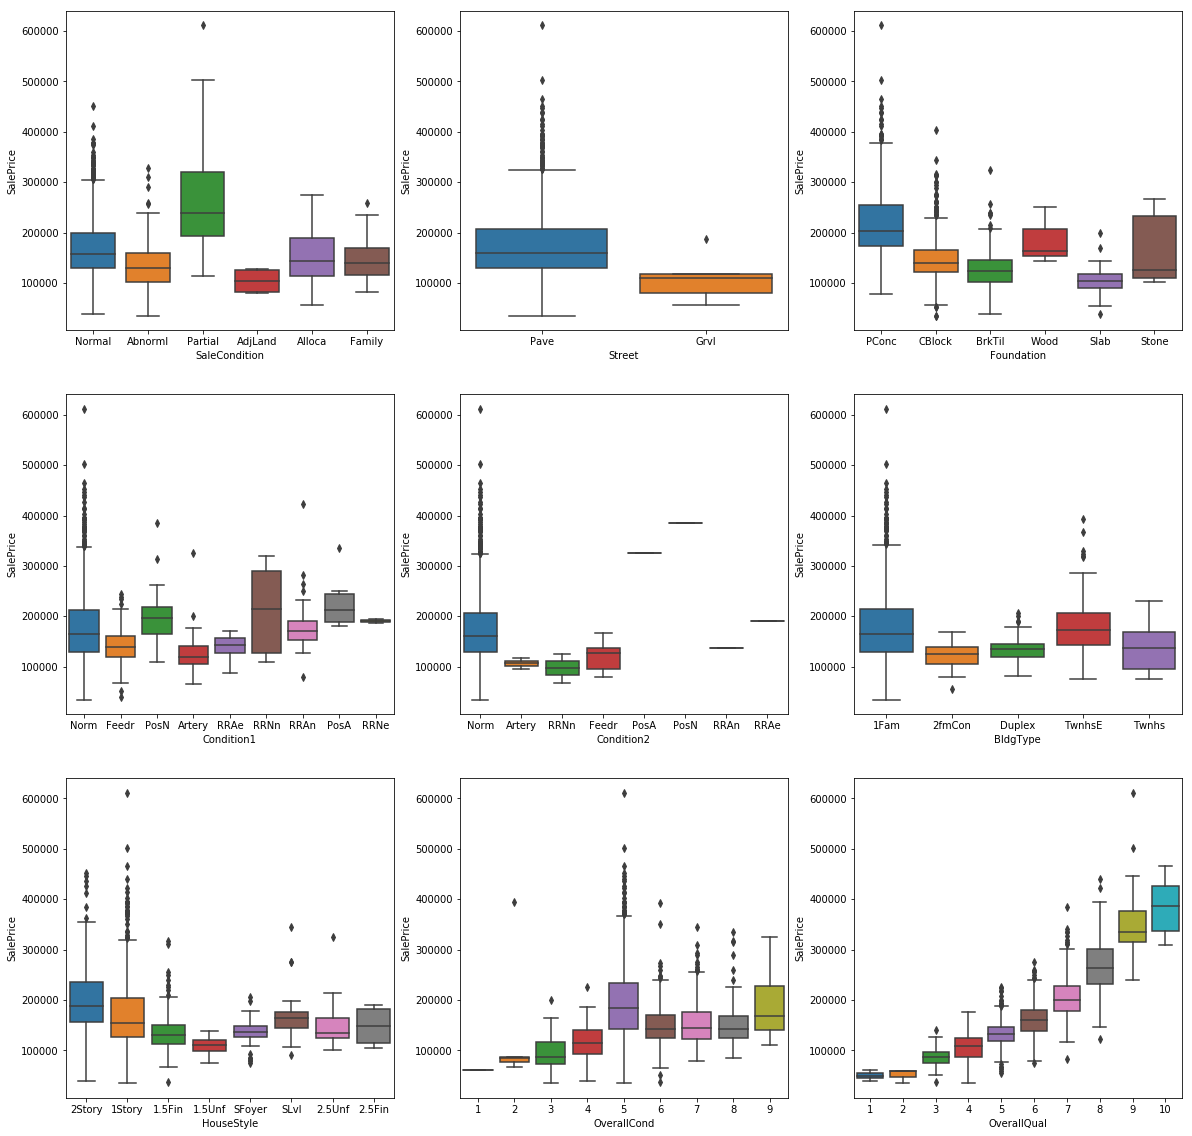

In [205]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='SaleCondition',y='SalePrice',data=data)

plt.subplot(3,3,2)
sns.boxplot(x='Street',y='SalePrice',data=data)

plt.subplot(3,3,3)
sns.boxplot(x='Foundation',y='SalePrice',data=data)

plt.subplot(3,3,4)
sns.boxplot(x='Condition1',y='SalePrice',data=data)

plt.subplot(3,3,5)
sns.boxplot(x='Condition2',y='SalePrice',data=data)

plt.subplot(3,3,6)
sns.boxplot(x='BldgType',y='SalePrice',data=data)

plt.subplot(3,3,7)
sns.boxplot(x='HouseStyle',y='SalePrice',data=data)

plt.subplot(3,3,8)
sns.boxplot(x='OverallCond',y='SalePrice',data=data)

plt.subplot(3,3,9)
sns.boxplot(x='OverallQual',y='SalePrice',data=data)

We are getting clear observations from the above picture
1)Paved Street has more Sale Price
2)Overall Condition of house is at 5, then more Sale Price
3)Overall Quality of house is more , then more Sale Price
4)Foundation of PConc and Stone has more Sale Price

In [206]:
data =backup2.copy()

## Dummy Variable Formation

In [207]:
data_categorical = data.select_dtypes(exclude=[np.number])
data_categorical.shape

(1415, 50)

In [208]:
data_numeric = data.select_dtypes(include=[np.number])
data_numeric.shape

(1415, 32)

In [209]:
numerical_vars = list(data_numeric.columns)
numerical_vars.remove('SalePrice')

In [210]:
# List of categorical variables
categorical_vars = list(data_categorical.columns)

In [211]:
data_categorical = pd.get_dummies(data_categorical, drop_first = True)
data_categorical.shape

(1415, 437)

In [212]:
data_categorical.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [213]:
data = pd.concat([data, data_categorical], axis = 1)
data.shape

(1415, 519)

In [214]:
#Drop original variables
data.drop(categorical_vars , axis = 1, inplace = True)
data.head()
print(data.shape)

(1415, 469)


In [215]:
data_final = data.drop([ 'Id'], axis=1)

### Splitting Data in Train and Test

In [216]:
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [217]:
#Scaling
scaler = MinMaxScaler()

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

y_train = df_train.pop('SalePrice')
X_train = df_train

In [218]:

# apply rescaling to the test set also
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

y_test = df_test.pop('SalePrice')
X_test = df_test

In [219]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((990, 468), (425, 468), (990,), (425,))

### Ridge Regression

In [220]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [221]:
Ridge_results = pd.DataFrame(ridge_cv.cv_results_)
Ridge_results = Ridge_results[Ridge_results['param_alpha']<=200]
Ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021601,0.002871,0.0014,0.00049,0.0001,{'alpha': 0.0001},0.840981,0.803925,0.815888,0.805532,...,0.811361,0.016871,26,0.971567,0.971253,0.966676,0.967717,0.968068,0.969056,0.001978
1,0.020401,0.002417,0.0016,0.00049,0.001,{'alpha': 0.001},0.843730,0.816091,0.817895,0.835343,...,0.824211,0.013219,25,0.971564,0.971227,0.966675,0.967693,0.968061,0.969044,0.001976
2,0.019001,0.001789,0.0016,0.00049,0.01,{'alpha': 0.01},0.850779,0.835826,0.831976,0.871022,...,0.847646,0.013730,23,0.971508,0.971056,0.966624,0.967517,0.967975,0.968936,0.001969
3,0.019601,0.002154,0.0016,0.00049,0.05,{'alpha': 0.05},0.862329,0.847181,0.858585,0.889540,...,0.865584,0.014101,22,0.971070,0.970753,0.966152,0.967054,0.967687,0.968543,0.001997
4,0.017201,0.000748,0.0012,0.00040,0.1,{'alpha': 0.1},0.868655,0.854235,0.872536,0.896552,...,0.874321,0.013864,20,0.970474,0.970360,0.965518,0.966543,0.967286,0.968036,0.002024


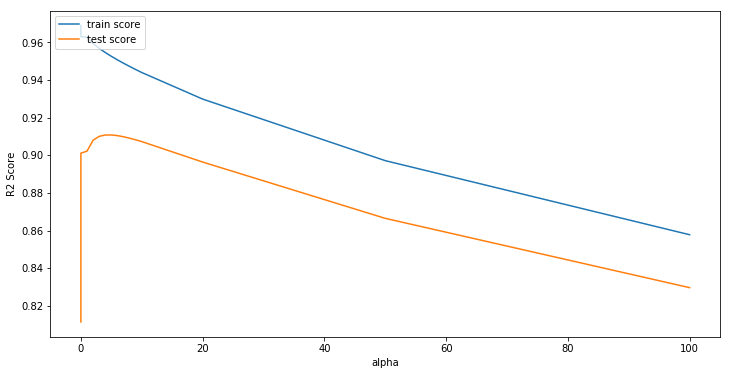

In [222]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

Ridge_results['param_alpha'] = Ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(Ridge_results['param_alpha'], Ridge_results['mean_train_score'])
plt.plot(Ridge_results['param_alpha'], Ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [223]:
ridge_cv.best_score_

0.910824476724931

In [224]:
ridge_cv.best_params_

{'alpha': 5.0}

This shows the best value for lambda is 5

In [225]:
alpha = 5

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [226]:
# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9506811427688995
0.8918524678234311


The R2 score shows good values for Train and Test

### Lasso Regression

In [227]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   41.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [228]:
Lasso_results = pd.DataFrame(lasso_cv.cv_results_)
Lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.371021,0.046211,0.0012,4.000187e-04,0.0001,{'alpha': 0.0001},0.841829,0.830673,0.817765,0.865403,...,0.839019,0.015656,28,0.971544,0.971045,0.966635,0.967524,0.968009,0.968951,0.001970
1,0.350220,0.033092,0.0012,4.000187e-04,0.001,{'alpha': 0.001},0.842237,0.830920,0.817828,0.865428,...,0.839181,0.015637,27,0.971544,0.971045,0.966635,0.967523,0.968009,0.968951,0.001970
2,0.354020,0.033742,0.0014,4.899014e-04,0.01,{'alpha': 0.01},0.844531,0.833094,0.818439,0.865705,...,0.840356,0.015448,26,0.971544,0.971044,0.966634,0.967522,0.968008,0.968950,0.001970
3,0.345620,0.022323,0.0010,1.168008e-07,0.05,{'alpha': 0.05},0.844881,0.835649,0.820954,0.866907,...,0.841981,0.014914,25,0.971543,0.971039,0.966633,0.967515,0.968004,0.968947,0.001970
4,0.352379,0.031081,0.0010,6.324851e-04,0.1,{'alpha': 0.1},0.845426,0.836240,0.823997,0.868261,...,0.843627,0.014494,23,0.971540,0.971032,0.966630,0.967505,0.967997,0.968941,0.001971


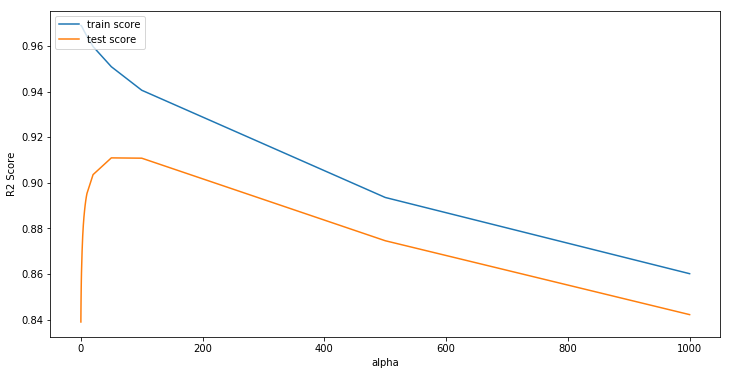

In [229]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

Lasso_results['param_alpha'] = Lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(Lasso_results['param_alpha'], Lasso_results['mean_train_score'])
plt.plot(Lasso_results['param_alpha'], Lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [230]:
lasso_cv.best_score_

0.9109275805387732

In [231]:
lasso_cv.best_params_


{'alpha': 50}

Optimal Value for Lambda in Lasso is 50

In [232]:
alpha_val =50

lasso = Lasso(alpha=alpha_val)
        
lasso.fit(X_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [233]:
# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9465299851362184
0.8931032749280223


In [234]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
var_selected = sum(coef != 0)
var_selected

191

In our case, Lasso has selected 191 features

In [235]:
# Best variables predicting housing prices as per Lasso Regression
main_coef = pd.concat([coef.sort_values().head(10),
                       coef.sort_values().tail(10)])

main_coef.sort_values(ascending=False)

Total_Area              103946.027635
GrLivArea                56702.753358
OverallQual_10           46025.898927
OverallQual_9            43400.178763
Neighborhood_StoneBr     26504.555752
BsmtFinSF1               25856.052777
LotArea                  25255.849585
OverallQual_8            25172.195203
Neighborhood_NridgHt     22240.846785
SaleType_New             21544.287776
YearBuilt_1965          -11381.274796
BsmtQual_Gd             -11408.023178
BsmtQual_TA             -11983.872022
ExterQual_Gd            -12056.648639
HouseStyle_2.5Fin       -13820.963929
ExterQual_Fa            -15103.921069
OverallCond_3           -18301.588139
ExterQual_TA            -19124.517173
LandSlope_Sev           -19215.256430
KitchenAbvGr            -34416.992748
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

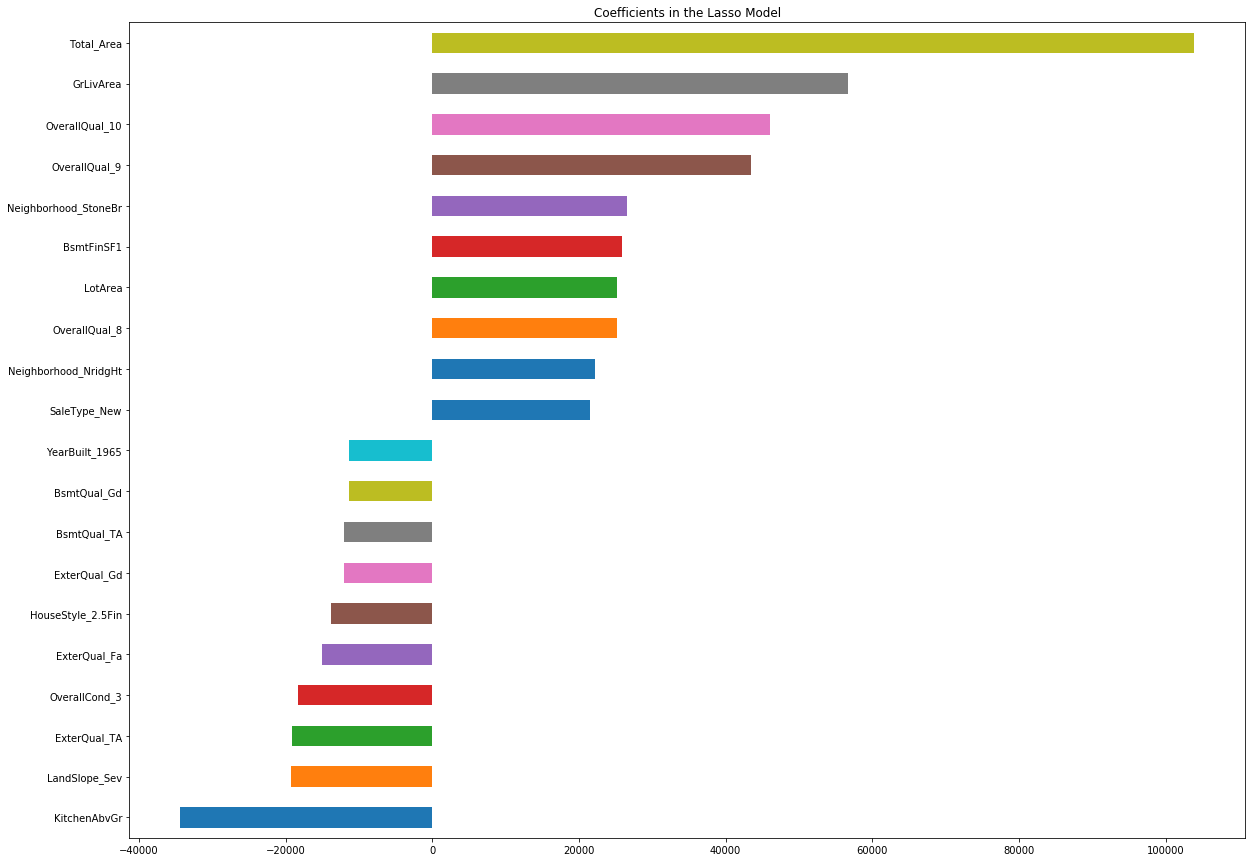

In [236]:
# Let's plot these variables
plt.figure(figsize = (20,15))

main_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Conclusion:
Following are the most significant variables in predicting the price of a house:

#### Most Positively Significant Variable
Total_Area (Derived Feature)              
GrLivArea                
OverallQual_10           
OverallQual_9            
Neighborhood_StoneBr 

#### Most Negatively Significant Variable
ExterQual_Fa            
OverallCond_3           
ExterQual_TA            
LandSlope_Sev           
KitchenAbvGr  

### Visualising Output

In [264]:
#Function to show relationship between the continuous data
def scatter_plt(col):
    ax = (data
    .plot
    .scatter(x=col, 
             y='SalePrice', 
             alpha=.5))
    ax.set_title(col + ' Vs Sales Price')
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')

In [265]:
#Function to show relatioship between the categorical data
def box_plt(col):
    ax =sns.boxplot(x=col, 
             y='SalePrice', 
             data=data)
    ax.set_title(col + ' Vs Sales Price')
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')

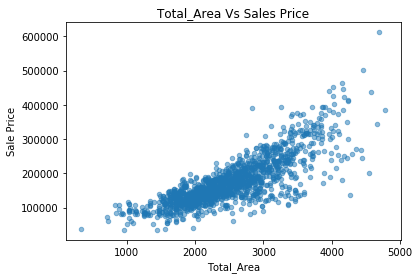

In [266]:
#1. Total_Area
scatter_plt('Total_Area')

As seen above, the sales price increases with the total area linearly

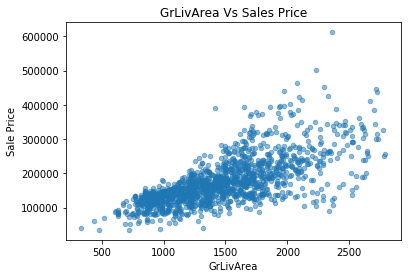

In [267]:
#2.#GrLivArea
scatter_plt('GrLivArea')

In [ ]:
As seen above, the sales price increases with the Living Area squarefeet linearly

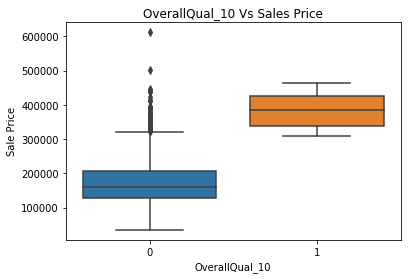

In [268]:
#3.OverallQual_10
box_plt('OverallQual_10')

As seen above, if the overall quality is 10 , sales price is higher

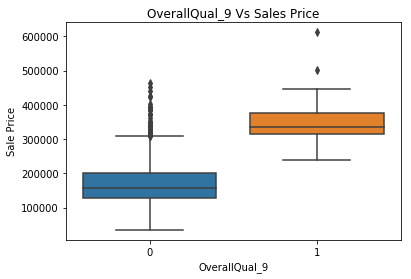

In [269]:
#4.OverallQual_9
box_plt('OverallQual_9')

If the overall quality is high, the sales price is higher.

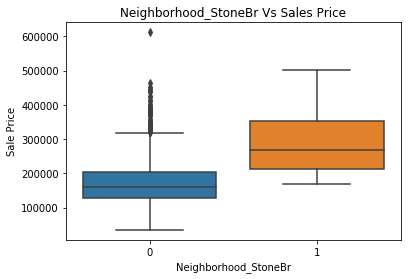

In [271]:
#5.Neighborhood_StoneBr
box_plt('Neighborhood_StoneBr')

If the neighbourhood is Stone Brook, the Sales Price is higher than other neighbourhood

#### Negative Correlation

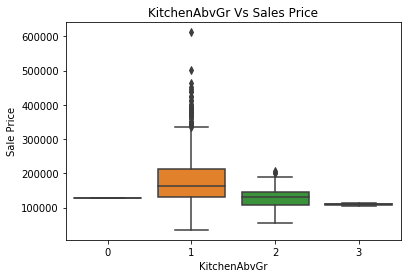

In [273]:
#1.KitchenAbvGr
box_plt('KitchenAbvGr')

If the Kitchen's Above Grade is lower, then the sales price is higher

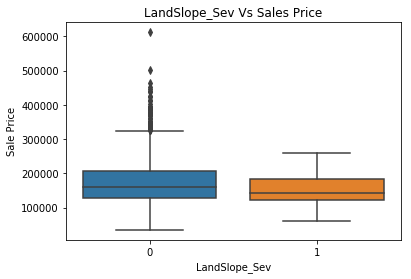

In [275]:
#2.LandSlope_Sev
box_plt('LandSlope_Sev')

If the Landslope is having severe slope, then the sales price is lower

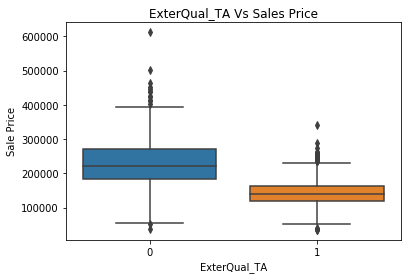

In [276]:
#3.ExterQual_TA
box_plt('ExterQual_TA')

In [ ]:
If the Exterior quality is average , then the sales price is lower

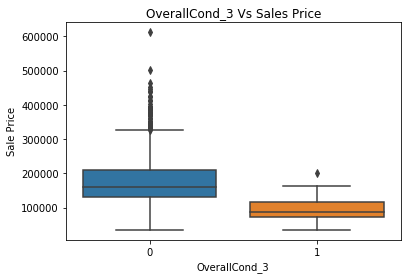

In [278]:
#4. OverallCond_3
box_plt('OverallCond_3')

If the overall condition is at 3, then the sales price is lower.

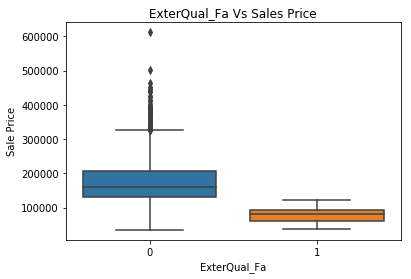

In [279]:
#5. ExterQual_Fa
box_plt('ExterQual_Fa')


If the exterior quality is fair, then the sales price is lower.